# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import probplot

### Importe o dataset

In [3]:
dados = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [4]:
dados.shape

(365, 2)

In [5]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

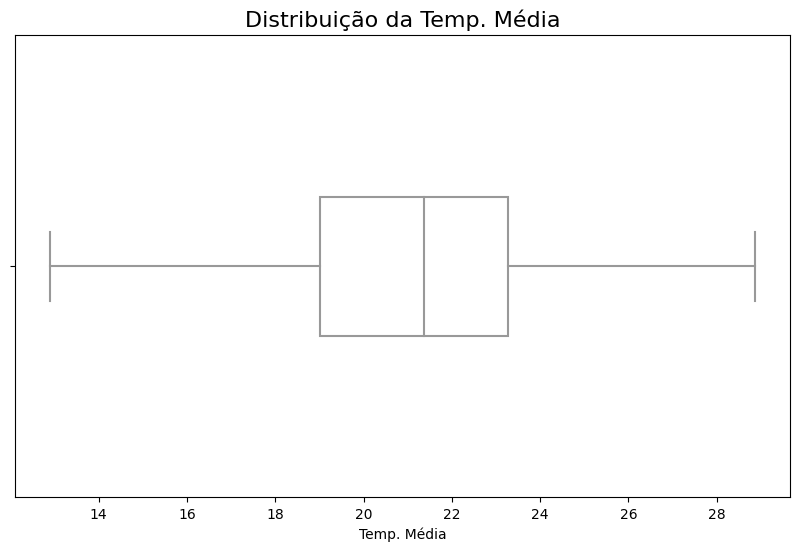

In [67]:
ax = sns.boxplot(data=dados, x='X', width=0.3, color='w')
ax.figure.set_size_inches(10, 6)
ax.set_xlabel('Temp. Média')
ax.set_title('Distribuição da Temp. Média', fontsize=16);

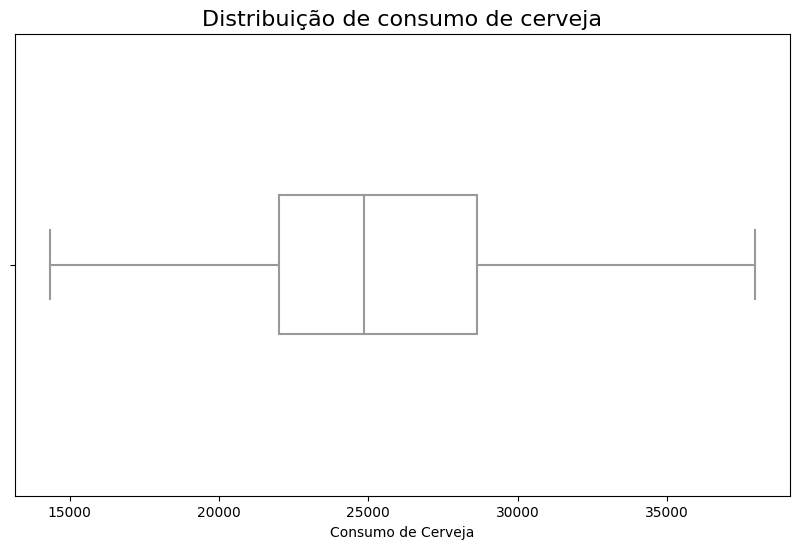

In [68]:
ax = sns.boxplot(data=dados, x='Y', width=0.3, color='w')
ax.figure.set_size_inches(10, 6)
ax.set_xlabel('Consumo de Cerveja')
ax.set_title('Distribuição de consumo de cerveja', fontsize=16);

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

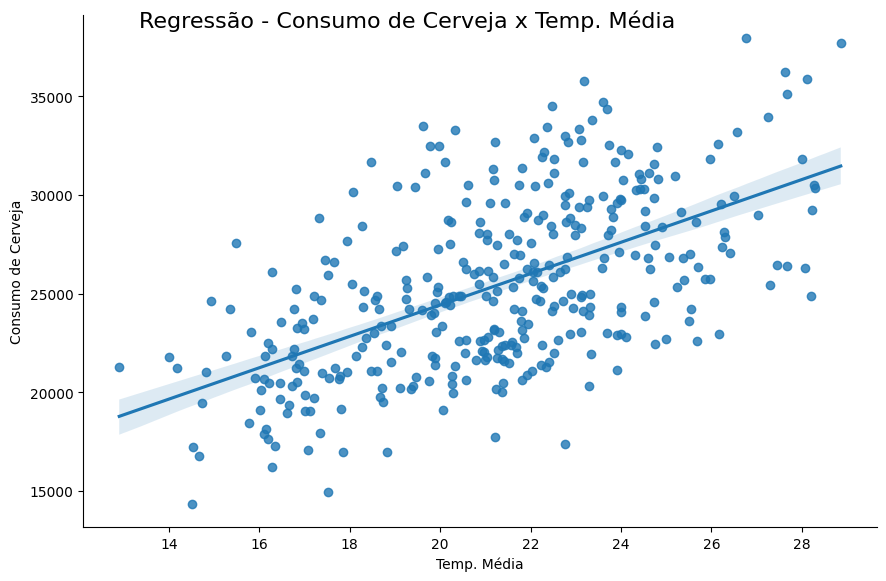

In [69]:
ax = sns.lmplot(data=dados, x='X', y='Y')
ax.fig.set_size_inches(10, 6)
ax.fig.suptitle('Regressão - Consumo de Cerveja x Temp. Média', fontsize=16)
ax.set_xlabels('Temp. Média')
ax.set_ylabels('Consumo de Cerveja');

### <font color='red'>Utilizando a matriz de correlação</font>

In [22]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim, utilizando o coeficiente de correlação (Coefieciente de Pearson)

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [37]:
X = sm.add_constant(dados['X'])
Y = dados['Y']

### Estime o modelo de regressão linear simples

In [38]:
regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [41]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.87e-33
Time:                        20:18:10   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [50]:
dados['Y Previsto'] = regressao.predict()
dados.head(10)

,Y,X,Y Previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
5,28218,23.78,27431.214014
6,29732,24.00,27606.088172
7,28397,24.90,28321.482455
8,24886,28.20,30944.594828
9,37937,26.76,29799.963974


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [71]:
print(f'Com uma temperatura média de 42°C, o consumo de cerveja em litros esperado é de: {regressao.predict([1, 42])[0]:.2f} litros')

Com uma temperatura média de 42°C, o consumo de cerveja em litros esperado é de: 41913.97 litros


### Obtenha os resíduos da regressão

In [51]:
dados['Residuos'] = regressao.resid
dados.head(10)

,Y,X,Y Previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
5,28218,23.78,27431.214014,786.785986
6,29732,24.00,27606.088172,2125.911828
7,28397,24.90,28321.482455,75.517545
8,24886,28.20,30944.594828,-6058.594828
9,37937,26.76,29799.963974,8137.036026


In [52]:
dados['Residuos'].mean()

1.0844166964700778e-11

### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

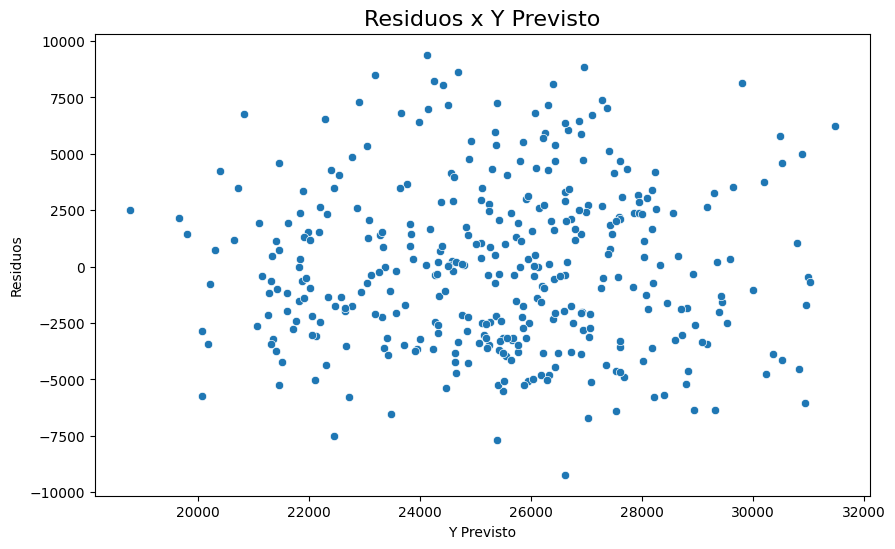

In [72]:
ax = sns.scatterplot(x=dados['Y Previsto'], y=dados['Residuos'])
ax.figure.set_size_inches(10, 6)
ax.set_title('Residuos x Y Previsto', fontsize=16)
ax;

### Obtenha o QQPlot dos resíduos

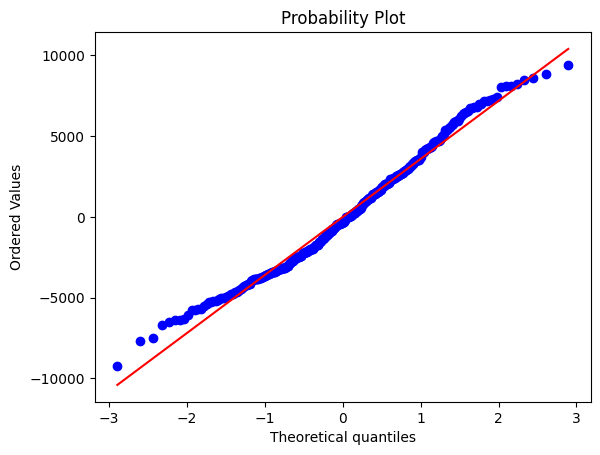

In [73]:
(_, (_, _, _)) = probplot(dados['Residuos'], plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [57]:
SQR = regressao.ess

In [58]:
SQE = regressao.ssr

In [60]:
SQT = SQR + SQE

In [61]:
R2 = SQR/SQT

In [62]:
R2

0.33018204933243206

In [63]:
regressao.rsquared

0.330182049332432